In [233]:
from warnings import filterwarnings

filterwarnings("ignore")

In [234]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

plt.rcParams["font.family"] = "serif"
plt.rcParams["font.size"] = 16
plt.rcParams["figure.figsize"] = (11,7)

In [235]:
np.random.seed(seed=10)
incomes = 10000*(1+np.random.pareto(1.0, 1000)) 
# fake data that somewhat models real income distributions
incomes = incomes.astype(int)

print("   min = " + str(min(incomes)))
print("   max = " + str(max(incomes)))
print("  mean = " + str(np.mean(incomes)))
print("median = " + str(np.median(incomes)))

   min = 10017
   max = 7348143
  mean = 70475.866
median = 19824.5


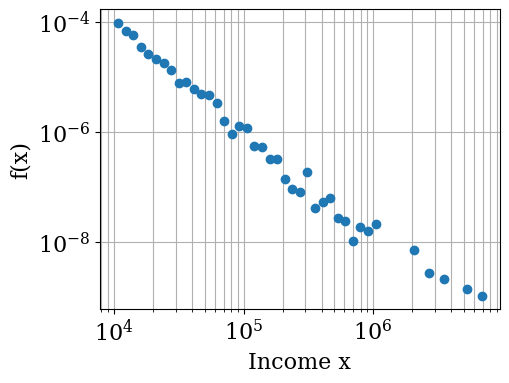

In [242]:
minx = min(incomes)
maxx = max(incomes)
num_bins = 50
logbins = np.logspace(np.log10(minx), np.log10(maxx), num_bins)


fig = plt.figure(figsize=(4, 3))
axes = fig.add_axes([0, 0, 1, 1])

h, binedges = np.histogram(incomes,  bins=logbins, density=True) # We use np.histogram to make the binning calculations. Plotting is done with axes.plot below.
binmidpoints = (binedges[1:] + binedges[:-1]) / 2
axes.plot(binmidpoints, h, "o")
#axes.plot(binmidpoints,income_x)
axes.set_xlabel("Income x")
axes.set_ylabel("f(x)");
axes.set_xscale('log') 
axes.set_yscale('log') 
axes.grid(True,which="both",ls="-") # Shown for teaching

In [241]:
len(binedges), len(h)

(50, 49)

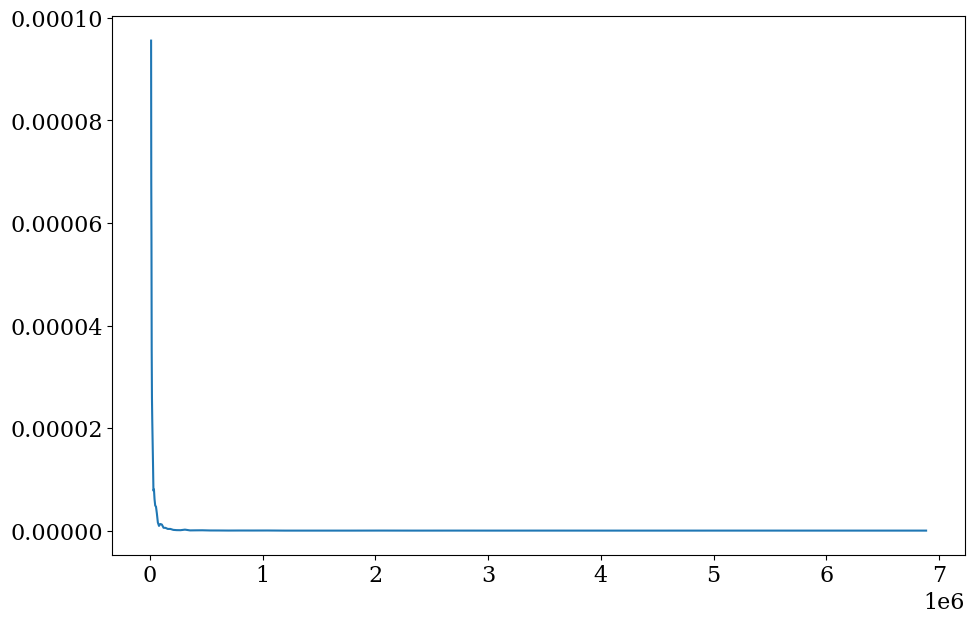

In [245]:
plt.plot(binmidpoints,h)

In [244]:
slope, intercept, r_value, _, _ = stats.linregress(binmidpoints, h)

income_x = intercept + slope * binmidpoints

income_x

array([ 1.09082035e-05,  1.09036582e-05,  1.08984578e-05,  1.08925077e-05,
        1.08857001e-05,  1.08779112e-05,  1.08689996e-05,  1.08588035e-05,
        1.08471378e-05,  1.08337907e-05,  1.08185197e-05,  1.08010475e-05,
        1.07810570e-05,  1.07581851e-05,  1.07320165e-05,  1.07020759e-05,
        1.06678198e-05,  1.06286261e-05,  1.05837832e-05,  1.05324766e-05,
        1.04737748e-05,  1.04066119e-05,  1.03297682e-05,  1.02418485e-05,
        1.01412562e-05,  1.00261648e-05,  9.89448428e-06,  9.74382363e-06,
        9.57144709e-06,  9.37422455e-06,  9.14857477e-06,  8.89040032e-06,
        8.59501314e-06,  8.25704948e-06,  7.87037245e-06,  7.42796061e-06,
        6.92178047e-06,  6.34264060e-06,  5.68002473e-06,  4.92190080e-06,
        4.05450250e-06,  3.06207925e-06,  1.92661021e-06,  6.27477062e-07,
       -8.58910387e-07, -2.55954258e-06, -4.50530029e-06, -6.73151541e-06,
       -9.27861246e-06])

In [184]:
# Load data

datamixed = pd.read_csv("files/insurance.csv")

income_data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


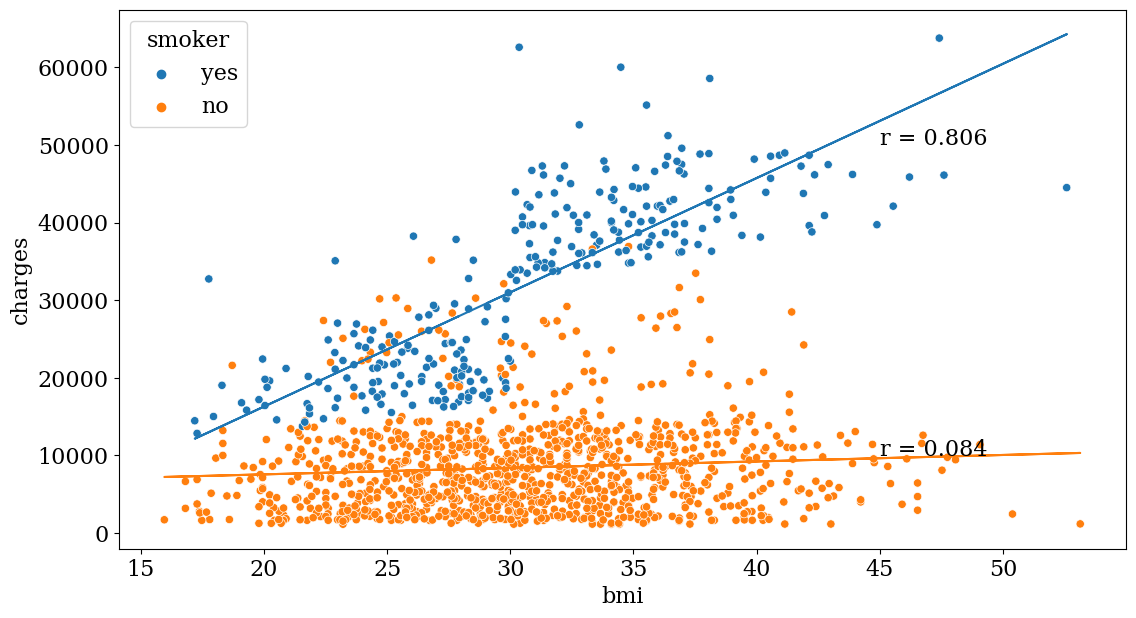

In [185]:
slope_yes, intercept_yes, r_value_yes, _, _ = stats.linregress(datamixed[datamixed["smoker"]=="yes"]['bmi'], datamixed[datamixed["smoker"]=="yes"]['charges'])
slope_no, intercept_no, r_value_no, _, _ = stats.linregress(datamixed[datamixed["smoker"]=="no"]['bmi'], datamixed[datamixed["smoker"]=="no"]['charges'])

charges_yes = intercept_yes+ slope_yes * datamixed[datamixed["smoker"]=="yes"]['bmi']

charges_no = intercept_no+ slope_no * datamixed[datamixed["smoker"]=="no"]['bmi']

plt.figure(figsize=(13,7))

plt.plot(datamixed[datamixed["smoker"]=="yes"]['bmi'],charges_yes)

plt.text(45, 50000, "r = " + str(round(r_value_yes, 3)))

plt.plot(datamixed[datamixed["smoker"]=="no"]['bmi'],charges_no)
plt.text(45, 10000, "r = " + str(round(r_value_no, 3)))

sns.scatterplot(data = datamixed, x="bmi", y="charges", hue = "smoker")

plt.show()

In [186]:
data_smoker = datamixed[datamixed["smoker"]=="yes"]

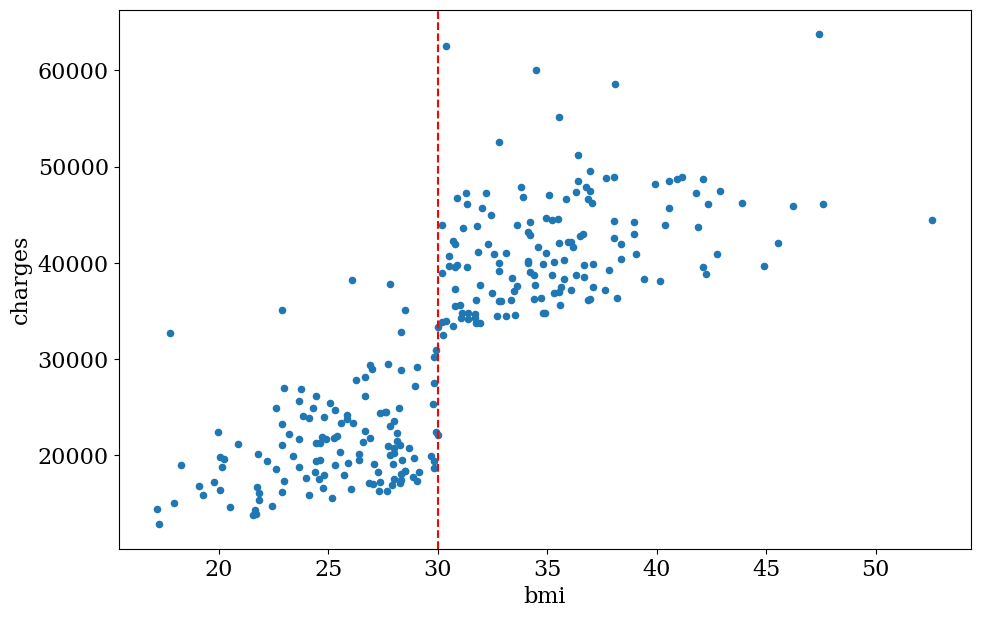

In [187]:
data_smoker.plot(kind = "scatter",x="bmi",y="charges")
plt.axvline(x=30, color="red",linestyle="--")
plt.show()

In [188]:
Threshold = 30

person_minus_30 = data_smoker[data_smoker["bmi"]<=30]
person_minus_30["bmi_class"] = "low BMI"

K = person_minus_30.shape[0]

person_plus_30 = data_smoker[data_smoker["bmi"]>30]
person_plus_30["bmi_class"] = "high BMI"

n = person_plus_30.shape[0]

N = data_smoker.shape[0]

In [189]:
from scipy.stats import hypergeom

rv = hypergeom(K, n, N)
x = 30 # np.arange(0, n+1)
pmf_dogs = rv.pmf(30)

pmf_dogs

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(x, pmf_dogs, 'bo')
ax.vlines(x, 0, pmf_dogs, lw=2)
ax.set_xlabel('# of dogs in our group of chosen animals')
ax.set_ylabel('hypergeom PMF')
plt.show()

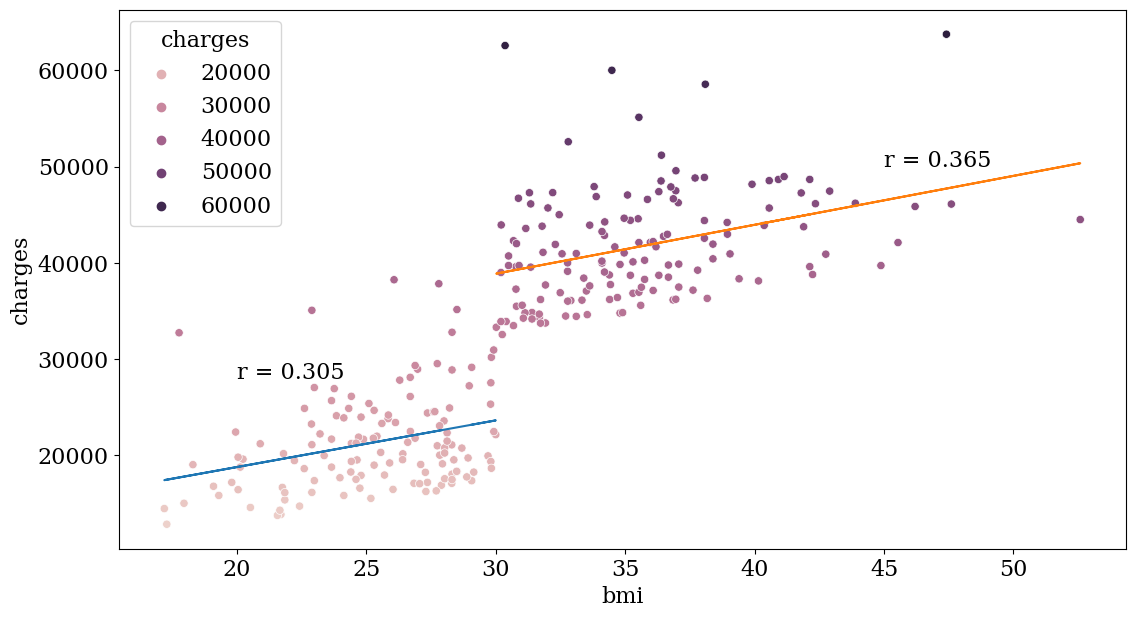

In [192]:
slope_plus_30, intercept_plus_30, r_value_plus_30, _, _ = stats.linregress(person_plus_30['bmi'], person_plus_30['charges'])
slope_minus_30, intercept_minus_30, r_value_minus_30, _, _ = stats.linregress(person_minus_30['bmi'], person_minus_30['charges'])


charges_minus_30 = intercept_minus_30+ slope_minus_30 * person_minus_30['bmi']

charges_plus_30 = intercept_plus_30+ slope_plus_30 * person_plus_30['bmi']

plt.figure(figsize=(13,7))

plt.plot(person_minus_30['bmi'],charges_minus_30)

plt.text(20, 28000, "r = " + str(round(r_value_minus_30, 3)))

plt.plot(person_plus_30['bmi'],charges_plus_30)
plt.text(45, 50000, "r = " + str(round(r_value_plus_30, 3)))

sns.scatterplot(data = data_smoker, x="bmi", y="charges", hue = data_smoker["charges"])

plt.show()

After creating two categories of high bmi and low bmi, the quality of the regression model decrease for both categories. 

In [193]:
data_smoker = person_minus_30.append(person_plus_30)

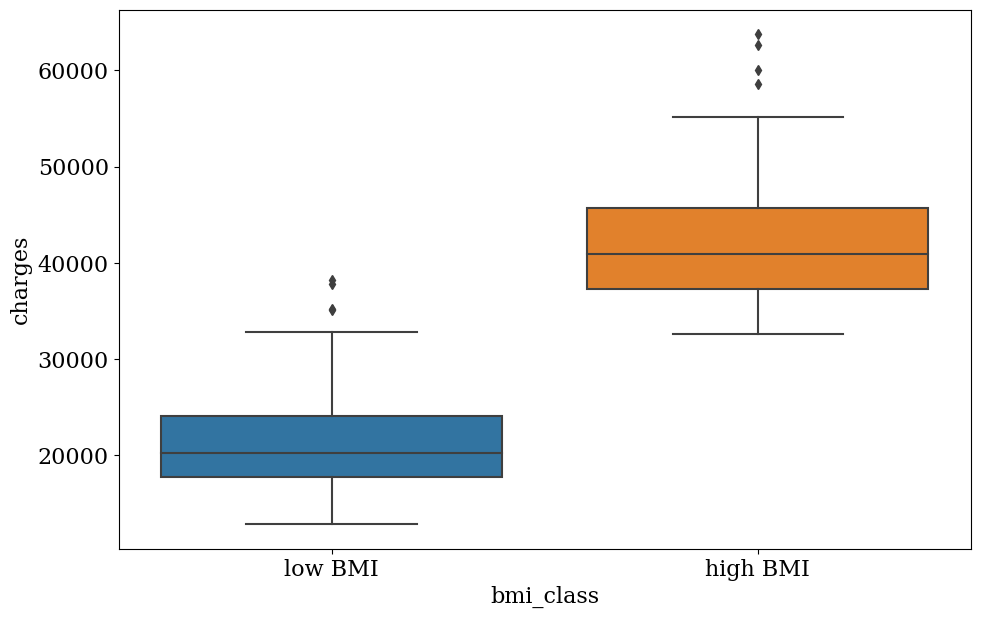

In [260]:
sns.boxplot(data = data_smoker, x = "bmi_class", y = "charges")
plt.show()

In [261]:
print(f"The mean and std of high bmi and low bmi are 

SyntaxError: EOL while scanning string literal (1817150020.py, line 1)

In [256]:
respectively: ({person_plus_30["charges"].mean():.3f, person_minus_30["charges"].mean():.3f}))# plus ou moins ({person_plus_30["charges"].std():.3f, person_minus_30["charges"].std():.3f})")

41692.80899152778

In [195]:
data_smoker.head()

,age,sex,bmi,children,smoker,region,charges,bmi_class
0,19,female,27.90,0,yes,southwest,16884.9240,low BMI
11,62,female,26.29,0,yes,southeast,27808.7251,low BMI
52,48,male,28.00,1,yes,southwest,23568.2720,low BMI
58,53,female,22.88,1,yes,southeast,23244.7902,low BMI
64,20,female,22.42,0,yes,northwest,14711.7438,low BMI


In [206]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, roc_auc_score
import statsmodels.api as sm

X = sm.add_constant(data_smoker["charges"])
#X = sm.add
y = [0 if x == "low BMI" else 1 for x in data_smoker["bmi_class"]]

X_train,X_test,y_train,y_test = train_test_split(X,y, train_size=80)

In [207]:
clf_tree = DecisionTreeClassifier();
clf_reg = LogisticRegression();

clf_tree.fit(X_train, y_train); 
clf_reg.fit(X_train, y_train);

In [208]:
y_score1 = clf_tree.predict_proba(X_test)[:,1]
y_score2 = clf_reg.predict_proba(X_test)[:,1]

In [209]:
false_positive_rate1, true_positive_rate1, threshold1 = roc_curve(y_test, y_score1)
false_positive_rate2, true_positive_rate2, threshold2 = roc_curve(y_test, y_score2)

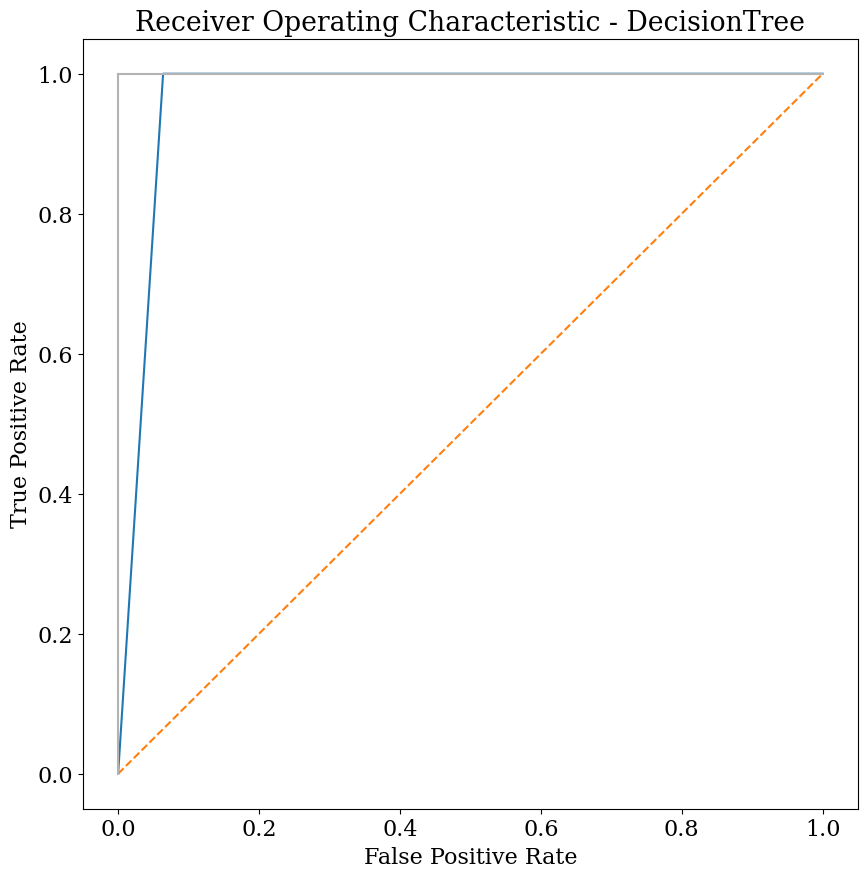

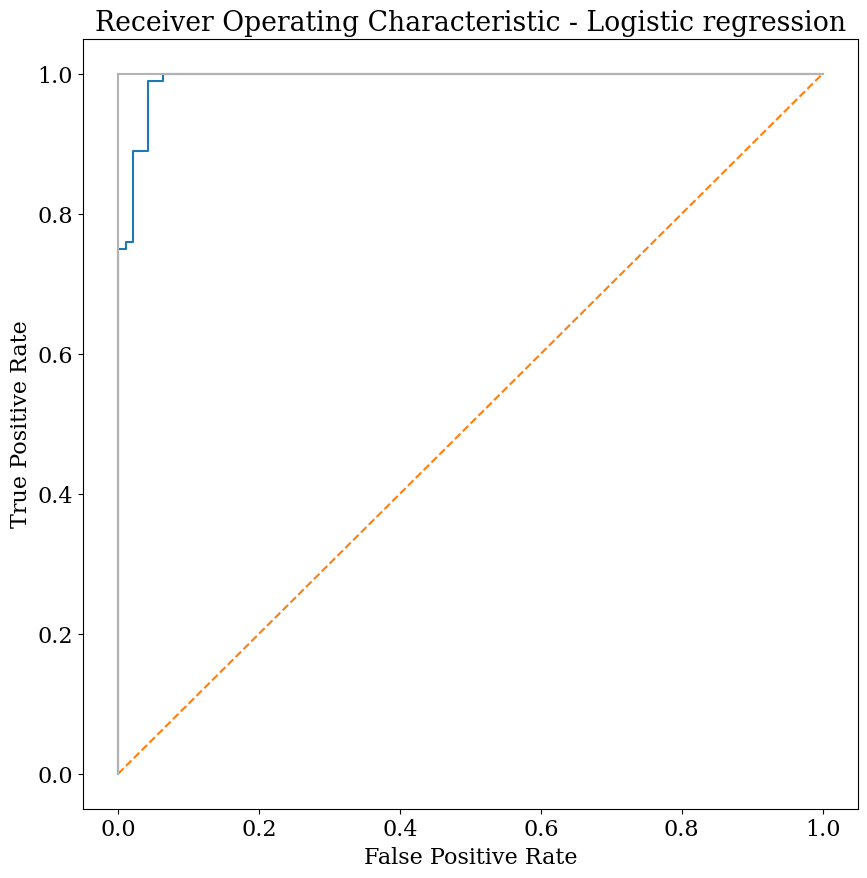

In [210]:
plt.subplots(1, figsize=(10,10))
plt.title('Receiver Operating Characteristic - DecisionTree')
plt.plot(false_positive_rate1, true_positive_rate1)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

plt.subplots(1, figsize=(10,10))
plt.title('Receiver Operating Characteristic - Logistic regression')
plt.plot(false_positive_rate2, true_positive_rate2)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [212]:
print(f"Decision tree auc score: {roc_auc_score(y_test,y_score1):.2%}")
print(f"Logistic regression auc score: {roc_auc_score(y_test,y_score2):.2%}")

Decision tree auc score: 96.81%
Logistic regression auc score: 99.22%
